In [6]:
from scipy.stats import norm

x = [10, np.sqrt(5)]
y = [1, np.sqrt(150)]

norm.cdf((x[0] - y[0])/np.sqrt((x[1]**2 + y[1]**2)))

0.765128538258379

In [318]:
a1 = [10, 0.00001**2]
a2 = [5, 7**2]
a3 = [8, 1**2]

e_1 = a1[0] + np.sqrt(a1[1])*norm.pdf((a1[0] - a1[0])/np.sqrt(a1[1]))/(1-norm.cdf((a1[0] - a1[0])/np.sqrt(a1[1])))
e_2 = a2[0] + np.sqrt(a2[1])*norm.pdf((a1[0] - a2[0])/np.sqrt(a2[1]))/(1-norm.cdf((a1[0] - a2[0])/np.sqrt(a2[1])))
e_3 = a3[0] + np.sqrt(a3[1])*norm.pdf((a1[0] - a3[0])/np.sqrt(a3[1]))/(1-norm.cdf((a1[0] - a3[0])/np.sqrt(a3[1])))

p_1 = 1-norm.cdf((a1[0]-a1[0])/np.sqrt(a1[1]))
p_2 = 1-norm.cdf((a1[0]-a2[0])/np.sqrt(a2[1]))
p_3 = 1-norm.cdf((a1[0]-a3[0])/np.sqrt(a3[1]))

In [319]:
print(e_1, e_2, e_3, p_1, p_2, p_3)

10.000007978845607 14.109801026080813 10.37321553282284 0.5 0.23752526202697655 0.02275013194817921


In [320]:
print('Scheme 1')
print('Potential value of taking action weighed by probability of success')
print(e_1*p_1, e_2*p_2, e_3*p_3)

print('Potential loss of taking action weighed by probability of failure')
print((a1[0]-a1[0])*(1-p_1), (a1[0]-a2[0])*(1-p_2), (a1[0]-a3[0])*(1-p_3))

print('Is is worth to take this action?')
print(e_1*p_1 > (a1[0]-a1[0])*(1-p_1), e_2*p_2 > (a1[0]-a2[0])*(1-p_2), e_3*p_3 > (a1[0]-a3[0])*(1-p_3))

Scheme 1
Potential value of taking action weighed by probability of success
5.000003989422804 3.3514341858683476 0.23599202209862172
Potential loss of taking action weighed by probability of failure
0.0 3.812373689865117 1.9544997361036416
Is is worth to take this action?
True False False


In [314]:
print('Scheme 2')
print('a2>a1 = ', norm.cdf((a2[0] - a1[0])/np.sqrt((a2[1]**2 + a1[1]**2))))
print('a3>a1 = ', norm.cdf((a3[0] - a1[0])/np.sqrt((a3[1]**2 + a1[1]**2))))

Scheme 2
a2>a1 =  0.4593621387038567
a3>a1 =  0.0


In [324]:
from scipy.stats import entropy

print(entropy([0.1, 0.5, 0.2, 0.2]))

print(entropy([0.01, 0.85, 0.05, 0.09]))

print(entropy([0.25, 0.25, 0.25, 0.25]))

print(entropy([1, 0, 0, 0]))

1.2206072645530175
0.5506945103893577
1.3862943611198906
0.0


In [230]:
print('Value of information in q units')
print(e_1-a1[0], e_2-a1[0], e_3-a1[0])

Value of information in q units
0.0007978845608036522 0.35268075098577967 0.2444561927113078


In [231]:
print('Value of information in q units weighed by probability')
print(p_1*(e_1-a1[0]), p_2*(e_2-a1[0]), p_3*(e_3-a1[0]))

Value of information in q units weighed by probability
0.0003989422804018261 7.176207156384138e-05 0.0012006801430331073


In [140]:
print(p_1/(p_1+p_2+p_3), p_2/(p_1+p_2+p_3), p_3/(p_1+p_2+p_3))

0.6094084542387069 0.06937889648903672 0.32121264927225635


In [141]:
print(e_1*p_1, e_2*p_2, e_3*p_3)

5.126156626101008 0.646060530353008 3.141240122396709


In [1]:
from src.environments import *
from src.agents import *

In [2]:
env   = CorridorMAB.default()
agent = BayesianAgent.default(decision_making_method = 'KG')

In [3]:
agent, regret = env.play_episode(1000, agent)

100%|██████████| 1000/1000 [02:08<00:00,  7.76it/s]


In [4]:
agent.pi, agent.Q, agent.u

(array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667]]),
 array([[-177.59860547, -178.94399105, -179.02442704, -178.79818503,
         -195.31720104, -198.59011572],
        [-179.55945685, -184.79550862, -186.4317892 , -182.99816562,
         -194.38507878, -199.3191531 ],
        [-181.57671928, -183.23019588, -184.10841378, -183.64942033,
         -198.19883926, -197.47112735],
        [-182.5293697 , -184.60594

In [6]:
from src.environments import *
from src.agents import *

env1   = CorridorMAB.default() # All negative until last room
env2   = CorridorMAB.default(reward_distrib_params = [[5,1], [-2,1], [-3,1], [-4,1], [-5,1], [-6,1], [10,1]]) # First positive but less than last one
env3   = CorridorMAB.default(reward_distrib_params = [[10,1], [-2,1], [-3,1], [-4,1], [-5,1], [-6,1], [5,1]]) # First positive and more than last one

In [7]:
regrets = {}
for idx_e, env in enumerate([env1, env2, env3]):
    agent_ucb  = BayesianAgent.default(decision_making_method = 'UCB')
    agent_soss = BayesianAgent.default(decision_making_method = 'SOSS')
    agent_kg   = BayesianAgent.default(decision_making_method = 'KG')
    for idx_a, agent in enumerate([agent_ucb, agent_soss, agent_kg]):
        agent, regret = env.play_episode(1500, agent)
        regrets[(idx_e, idx_a)] = regret

100%|██████████| 1500/1500 [03:03<00:00,  8.17it/s]


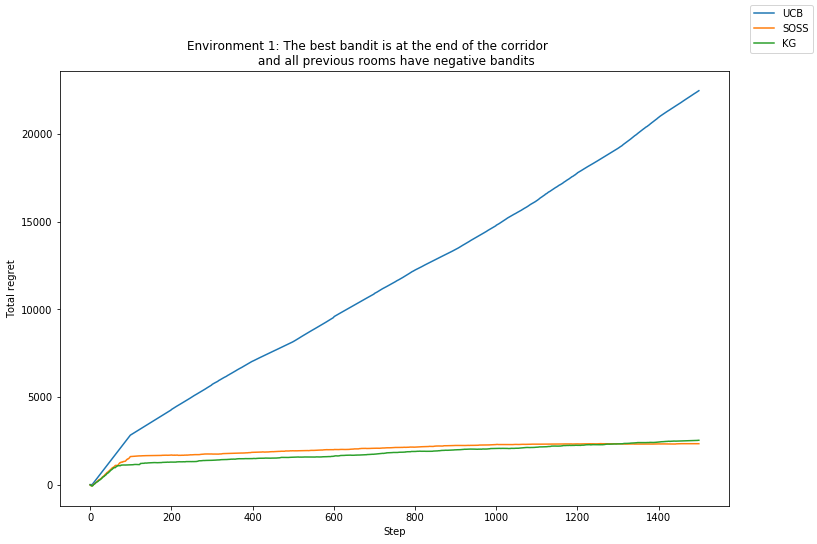

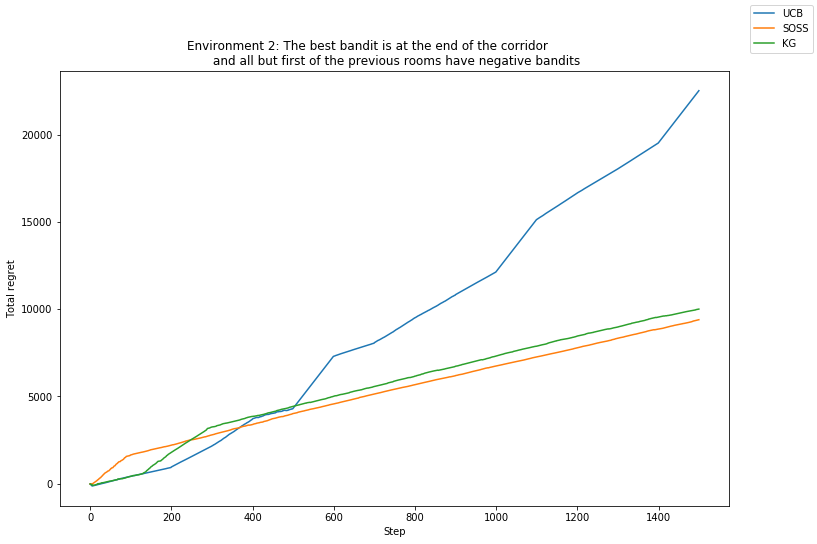

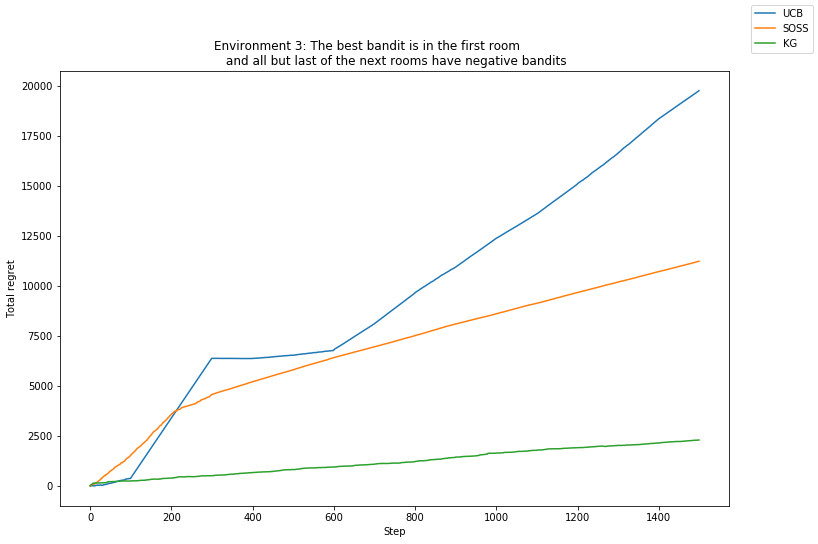

In [10]:
import matplotlib.pyplot as plt

fig  = plt.figure(figsize = (12,8))
fig2 = plt.figure(figsize = (12,8))
fig3 = plt.figure(figsize = (12,8)) 

ax  = fig.add_subplot(111)
ax2 = fig2.add_subplot(111)
ax3 = fig3.add_subplot(111)

ax.plot(regrets[(0, 0)], label = 'UCB')
ax.plot(regrets[(0, 1)], label = 'SOSS')
ax.plot(regrets[(0, 2)], label = 'KG')


ax.set_title('Environment 1: The best bandit is at the end of the corridor \
             \n and all previous rooms have negative bandits')
ax.set_ylabel('Total regret')
ax.set_xlabel('Step')

ax2.plot(regrets[(1, 0)], label = 'UCB')
ax2.plot(regrets[(1, 1)], label = 'SOSS')
ax2.plot(regrets[(1, 2)], label = 'KG')

ax2.set_title('Environment 2: The best bandit is at the end of the corridor \
             \n and all but first of the previous rooms have negative bandits')
ax2.set_ylabel('Total regret')
ax2.set_xlabel('Step')

ax3.plot(regrets[(2, 0)], label = 'UCB')
ax3.plot(regrets[(2, 1)], label = 'SOSS')
ax3.plot(regrets[(2, 2)], label = 'KG')



ax3.set_title('Environment 3: The best bandit is in the first room \
             \n and all but last of the next rooms have negative bandits')
ax3.set_ylabel('Total regret')
ax3.set_xlabel('Step')

fig.legend()
fig2.legend()
fig3.legend()

fig.savefig('env1')
fig2.savefig('env2')
fig3.savefig('env3')

plt.show()

In [7]:
env1   = CorridorMAB.default(move_penalty = 0) # All negative until last room
env2   = CorridorMAB.default(reward_distrib_params = [[5,1], [-2,1], [-3,1], [-4,1], [-5,1], [-6,1], [10,1]],
                             move_penalty = 0) # First positive but less than last one
env3   = CorridorMAB.default(reward_distrib_params = [[10,1], [-2,1], [-3,1], [-4,1], [-5,1], [-6,1], [5,1]],
                             move_penalty = 0) # First positive and more than last one

In [8]:
regrets_0 = {}
for idx_e, env in enumerate([env1, env2, env3]):
    agent_ucb  = BayesianAgent.default(decision_making_method = 'UCB')
    agent_soss = BayesianAgent.default(decision_making_method = 'SOSS')
    for idx_a, agent in enumerate([agent_ucb, agent_soss]):
        agent, regret = env.play_episode(1500, agent)
        regrets_0[(idx_e, idx_a)] = regret

100%|██████████| 1500/1500 [00:43<00:00, 34.35it/s]


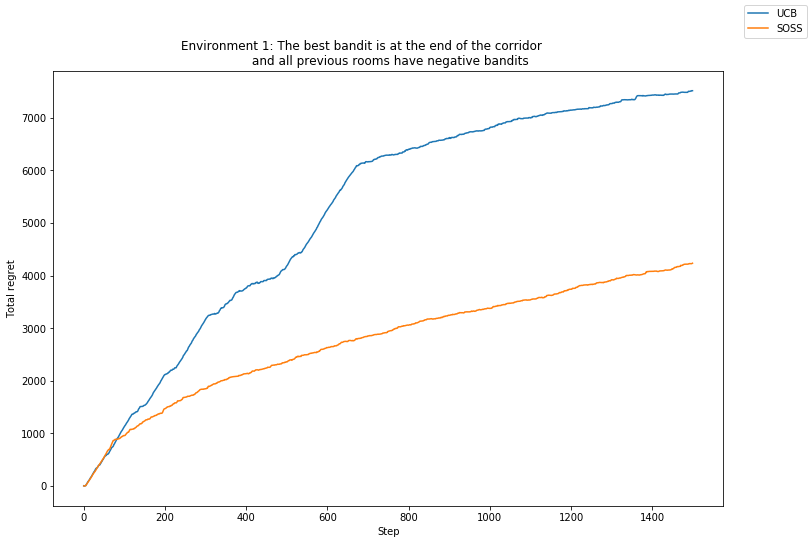

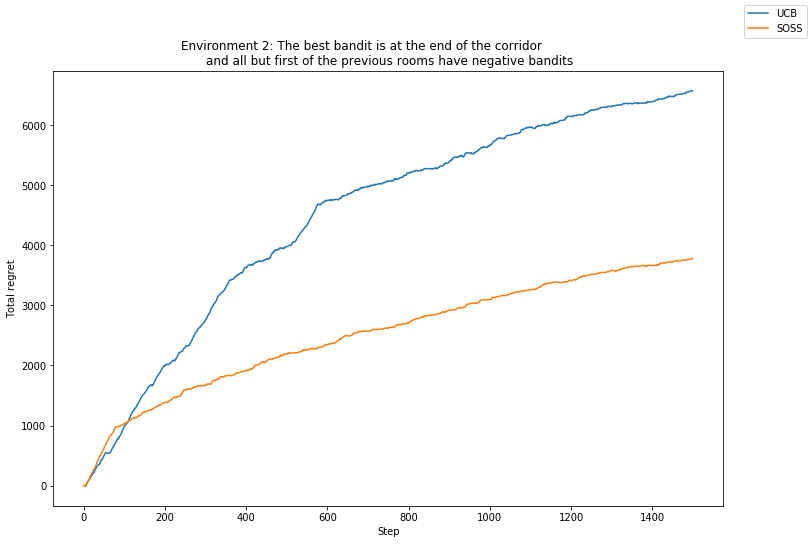

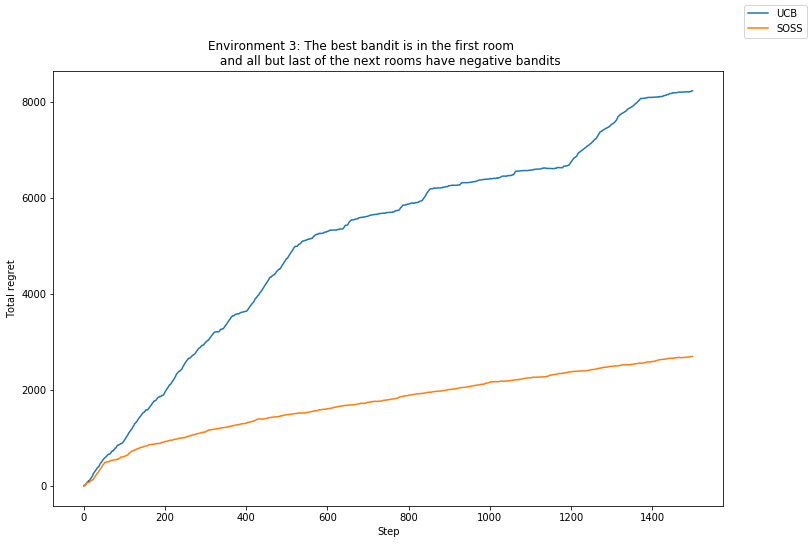

In [9]:
fig  = plt.figure(figsize = (12,8))
fig2 = plt.figure(figsize = (12,8))
fig3 = plt.figure(figsize = (12,8)) 

ax  = fig.add_subplot(111)
ax2 = fig2.add_subplot(111)
ax3 = fig3.add_subplot(111)

ax.plot(regrets_0[(0, 0)], label = 'UCB')
ax.plot(regrets_0[(0, 1)], label = 'SOSS')

ax.set_title('Environment 1: The best bandit is at the end of the corridor \
             \n and all previous rooms have negative bandits')
ax.set_ylabel('Total regret')
ax.set_xlabel('Step')

ax2.plot(regrets_0[(1, 0)], label = 'UCB')
ax2.plot(regrets_0[(1, 1)], label = 'SOSS')

ax2.set_title('Environment 2: The best bandit is at the end of the corridor \
             \n and all but first of the previous rooms have negative bandits')
ax2.set_ylabel('Total regret')
ax2.set_xlabel('Step')

ax3.plot(regrets_0[(2, 0)], label = 'UCB')
ax3.plot(regrets_0[(2, 1)], label = 'SOSS')


ax3.set_title('Environment 3: The best bandit is in the first room \
             \n and all but last of the next rooms have negative bandits')
ax3.set_ylabel('Total regret')
ax3.set_xlabel('Step')

fig.legend()
fig2.legend()
fig3.legend()

plt.show()

In [1]:
from src.environments import *
from src.agents import *

env   = CorridorMAB.default() # All negative until last room

In [2]:

agent_ucb_9  = BayesianAgent.default(decision_making_method = 'UCB',
                                     decision_making_method_params = 0.9,
                                     Q_method = 'predictive',
                                     u_method = 'predictive')

agent_ucb_8  = BayesianAgent.default(decision_making_method = 'UCB',
                                     decision_making_method_params = 0.8,
                                     Q_method = 'predictive',
                                     u_method = 'predictive')

agent_ucb_5  = BayesianAgent.default(decision_making_method = 'UCB',
                                     decision_making_method_params = 0.5,
                                     Q_method = 'predictive',
                                     u_method = 'predictive')

agent_ts = BayesianAgent.default(decision_making_method = 'TS',
                                   Q_method = 'predictive',
                                   u_method = 'predictive')

agent_soss = BayesianAgent.default(decision_making_method = 'SOSS',
                                   Q_method = 'predictive',
                                   u_method = 'predictive')

agent_kg   = BayesianAgent.default(decision_making_method = 'MC1-KG',
                                   Q_method = 'predictive')

agent_kg2   = BayesianAgent.default(decision_making_method = 'MCN-KG',
                                    decision_making_method_params = 2,
                                   Q_method = 'predictive')

agent_kg4   = BayesianAgent.default(decision_making_method = 'MCN-KG',
                                    decision_making_method_params = 4,
                                   Q_method = 'predictive')

agent_kg2, regret_kg2 = env.play_episode(1000, agent_kg2)
agent_kg4, regret_kg4 = env.play_episode(1000, agent_kg4)
agent_kg, regret_kg = env.play_episode(1000, agent_kg)

agent_soss, regret_soss = env.play_episode(1000, agent_soss)

agent_ts, regret_ts = env.play_episode(1000, agent_ts)

agent_ucb_9, regret_ucb_9 = env.play_episode(1000, agent_ucb_9)
agent_ucb_8, regret_ucb_8 = env.play_episode(1000, agent_ucb_8)
agent_ucb_5, regret_ucb_5 = env.play_episode(1000, agent_ucb_5)


100%|██████████| 1000/1000 [00:03<00:00, 306.06it/s]


In [8]:
agent_kg.memory_buffer[-10:]

[[0, 6, 0, 10.260886225147283],
 [0, 6, 0, 9.276925075118575],
 [0, 6, 0, 12.178239154714717],
 [0, 6, 0, 8.320432016786134],
 [0, 6, 0, 7.842369360804662],
 [0, 6, 0, 11.513450112259644],
 [0, 6, 0, 13.101220990189894],
 [0, 6, 0, 10.028424232830625],
 [0, 6, 0, 10.025168730036144],
 [0, 6, 0, 9.755079972677482]]

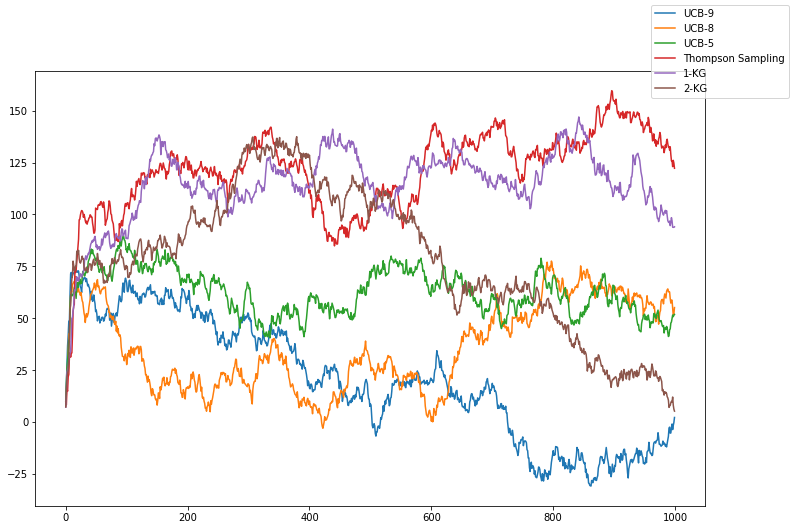

In [11]:
import matplotlib.pyplot as plt

fig  = plt.figure(figsize = (12,8))
ax  = fig.add_subplot(111)

ax.plot(regret_ucb_9, label = 'UCB-9')
ax.plot(regret_ucb_8, label = 'UCB-8')
ax.plot(regret_ucb_5, label = 'UCB-5')

ax.plot(regret_ts, label = 'Thompson Sampling')

#ax.plot(regret_soss, label = 'SOSS')

ax.plot(regret_kg, label = '1-KG')
ax.plot(regret_kg2, label = '2-KG')
#ax.plot(regret_kg4, label = '4-KG')


fig.legend()

plt.show()

In [9]:
agent_soss.pi

array([[5.69150337e-14, 1.21643259e-06, 9.48824500e-12, 2.17776233e-06,
        2.33213203e-04, 9.61280136e-06, 5.89682103e-04, 6.81904141e-04,
        2.14567025e-06, 9.98480048e-01]])

In [1]:
from src.environments import *
from src.agents import *

env   = MultiArmedBandit.default()
agent_p  = BayesianAgent.default(Q_method = 'predictive', u_method = 'predictive')
agent_mc = BayesianAgent.default(Q_method = 'monte_carlo')

agent_p, regret_p = env.play_episode(200, agent_p)

100%|██████████| 200/200 [00:05<00:00, 38.22it/s]


In [15]:
np.ones((1,1,5))

array([[[1., 1., 1., 1., 1.]]])

In [16]:
igor = np.array([[1,1], [2,2], [3,0.5], [4,5], [8,2], [3,1], [10,2], [-1,5], [2,4], [9,0.5]])

igor[:,0]

array([ 1.,  2.,  3.,  4.,  8.,  3., 10., -1.,  2.,  9.])

In [17]:
env = CorridorMAB.default()

In [ ]:
env